### The mojor Steps involved are:-
1. Reading the Dataset.
2. Data Cleaning.
3. Data Preparation
4. Train-Test split
5. Feature Selection using RFE
6. Model Formation
7. Plotting ROC curve
8. Prediction Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the basic libraries
import numpy as np
import pandas as pd

# importing the libraries for Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing model formation libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Reading the Dataset

In [4]:
#Importing dataset
df_leads = pd.read_csv('D:/Lead Scoring case study/Leads.csv')
df_leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [5]:
print(df_leads.shape[0],'- Rows and ', df_leads.shape[1],'- Columns')

9240 - Rows and  37 - Columns


In [6]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## 2. Data Cleaning

## Analyse non - numeric attributes

In [7]:
df_leads['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [8]:
df_leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [9]:
df_leads['Do Not Email'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df_leads['Do Not Call'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df_leads['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [12]:
df_leads['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [13]:
df_leads['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [14]:
df_leads['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [15]:
df_leads['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [16]:
df_leads['What matters most to you in choosing a course'].unique()


array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [17]:
df_leads['Search'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df_leads['Magazine'].unique()

array(['No'], dtype=object)

In [19]:
df_leads['Newspaper Article'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df_leads['X Education Forums'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df_leads['Newspaper'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df_leads['Digital Advertisement'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
df_leads['Through Recommendations'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df_leads['Receive More Updates About Our Courses'].unique()

array(['No'], dtype=object)

In [25]:
df_leads['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [26]:
df_leads['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [27]:
df_leads['Update me on Supply Chain Content'].unique()

array(['No'], dtype=object)

In [28]:
df_leads['Get updates on DM Content'].unique()

array(['No'], dtype=object)

In [29]:
df_leads['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [30]:
df_leads['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [31]:
df_leads['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [32]:
df_leads['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [33]:
df_leads['I agree to pay the amount through cheque'].unique()

array(['No'], dtype=object)

In [34]:
df_leads['A free copy of Mastering The Interview'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
df_leads['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

## Above Non- Numeric columns 
1 Magazine 
2 Receive More Updates About Our Courses ,
3 Update me on Supply Chain Content,
4 Get updates on DM Content,
5 I agree to pay the amount through cheque,
### have same value as 'no' which will have no impact on model,  therefore we can directly drop those columns

In [36]:
df_leads = df_leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

### Prospect ID have no information other than unique customer ID and do not have any particular pattern.

In [37]:
df_leads.shape

(9240, 32)

### Other Numeric values columns

In [38]:
df_leads['Lead Number'].unique()

array([660737, 660728, 660727, ..., 579545, 579538, 579533], dtype=int64)

In [39]:
df_leads['Converted'].unique()

array([0, 1], dtype=int64)

In [40]:
df_leads['TotalVisits'].unique()


array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,  nan,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,
        18.,  20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,
        28.,  26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [41]:
df_leads['Total Time Spent on Website'].unique()


array([   0,  674, 1532, ...,  603,  483,  927], dtype=int64)

In [42]:
df_leads['Page Views Per Visit'].unique()


array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,   nan,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,
        2.57,  2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,
        3.2 ,  1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,
        1.83,  3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,
        2.9 ,  1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,
        1.86,  2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,
        4.4 ,  3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,
        2.13,  2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,
        3.8 ,  1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [43]:
df_leads['Asymmetrique Activity Score'].unique()


array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [44]:
df_leads['Asymmetrique Profile Score'].unique()


array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

### 

In [45]:
# Description of all numeric values in dataframe
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [46]:
# Percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

### Missing value imputation
30 % > drop rows
less than 30 % 

if we impute distribution should remain untouched


The 'Asymmetrique Activity Index' column has 45.65% of the missing values, let us drop the column and look after the changes in the %age of the various other columns.

In [47]:
new_lead_df = df_leads[~pd.isnull(df_leads['Lead Quality'])]

Checking the null values for the Dataset

In [48]:
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.49
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       2.21
Total Time Spent on Website                       0.00
Page Views Per Visit                              2.21
Last Activity                                     1.74
Country                                          21.84
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [49]:
new_lead_df.shape

(4473, 32)

We have lost more than half of the information, but the various columns are still comprising of null values

Let us again drop the rows having null values present in the column 'Asymmetrique Activity Index' and see its effect on the columns

In [50]:
new_lead_df = new_lead_df[~pd.isnull(new_lead_df['Asymmetrique Activity Index'])]

In [51]:
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.49
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       2.53
Total Time Spent on Website                       0.00
Page Views Per Visit                              2.53
Last Activity                                     1.88
Country                                          20.21
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [52]:
new_lead_df.shape

(2449, 32)

We have now lost more than 70% of our data

In [53]:
corrmat = df_leads.corr()

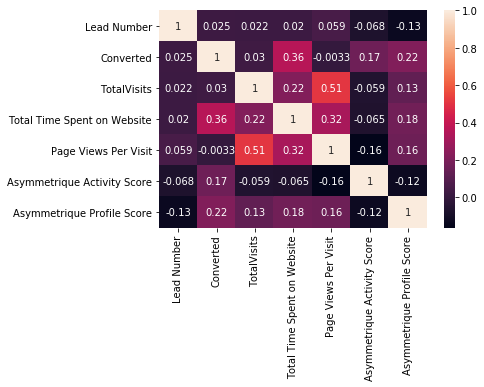

In [54]:
sns.heatmap(corrmat,annot=True)

Dropping the columns having high null values

In [55]:
new_lead_df = df_leads.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [56]:
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

Now, getting rid of the rows which are having null values present in the column 'Tags'

In [57]:
new_lead_df = new_lead_df[~pd.isnull(new_lead_df['Tags'])]

In [58]:
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.42
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.99
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.99
Last Activity                                     1.60
Country                                          21.78
Specialization                                    0.58
How did you hear about X Education                1.16
What is your current occupation                   1.38
What matters most to you in choosing a course     1.38
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [59]:
new_lead_df.shape

(5887, 27)

In this way we are left with 65% of the original Dataset

Dealing with the 'Country' column

In [60]:
new_lead_df['Country'].unique()

array([nan, 'India', 'Oman', 'United Arab Emirates', 'United States',
       'United Kingdom', 'Bahrain', 'Qatar', 'Australia', 'Ghana',
       'Singapore', 'Saudi Arabia', 'Sri Lanka', 'Kuwait', 'France',
       'Canada', 'Netherlands', 'Sweden', 'Hong Kong', 'Germany',
       'Nigeria', 'Uganda', 'Kenya', 'South Africa', 'Tanzania',
       'Malaysia', 'Italy', 'Denmark', 'Philippines', 'Vietnam',
       'Indonesia', 'China', 'Bangladesh'], dtype=object)

In [61]:
# counting number of times the value 'India' has occured in 'Country'
print('The number of times India has occured is ',new_lead_df[new_lead_df['Country']== 'India'].shape[0],'. And total null values are ',5887*0.21)

The number of times India has occured is  4412 . And total null values are  1236.27


Hence this column 'Country' can be removed.

In [62]:
new_lead_df = new_lead_df.drop(['Country'], axis=1)
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.42
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.99
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.99
Last Activity                                    1.60
Specialization                                   0.58
How did you hear about X Education               1.16
What is your current occupation                  1.38
What matters most to you in choosing a course    1.38
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

Let us take the 'Lead Source' column

In [63]:
new_lead_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'Pay per Click Ads', 'bing', 'Social Media', nan, 'WeLearn',
       'Live Chat', 'Click2call', 'testone', 'Press_Release'],
      dtype=object)

We cannot impute any values to the 'Lead Source' columns so dropping the 0.42% null valued rows

In [64]:
new_lead_df = new_lead_df[~pd.isnull(new_lead_df['Lead Source'])]

In [65]:
new_lead_df.shape

(5862, 26)

In [66]:
new_lead_df['TotalVisits'].describe()

count    5747.000000
mean        3.727336
std         4.907139
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [67]:
new_lead_df['TotalVisits'].mode()

0    2.0
dtype: float64

In [68]:
# counting number of times the value '2.0' has occured in 'TotalVisits'
print(new_lead_df[new_lead_df['TotalVisits']== 2.0].shape[0])

1129


In [69]:
# counting number of times the value '3.0' has occured in 'TotalVisits'
print(new_lead_df[new_lead_df['TotalVisits']== 3.0].shape[0])

865


In [70]:
print('There are only ',5862*0.02,' null value, which can be imputed by 2.0 and would not affect much')

There are only  117.24000000000001  null value, which can be imputed by 2.0 and would not affect much


Imputing the null values present in the column 'TotalVisits' by 2.0

In [71]:
new_lead_df.loc[pd.isnull(new_lead_df['TotalVisits']),['TotalVisits']] = 2.0

In [72]:
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.96
Last Activity                                    1.59
Specialization                                   0.58
How did you hear about X Education               1.16
What is your current occupation                  1.38
What matters most to you in choosing a course    1.38
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [73]:
new_lead_df['Page Views Per Visit'].describe()

count    5747.000000
mean        2.579245
std         2.062009
min         0.000000
25%         1.250000
50%         2.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

Thw null values in 'Page Views Per Visit' can very well be imputed by the mode of this column.

In [74]:
new_lead_df['Page Views Per Visit'].mode()

0    2.0
dtype: float64

In [75]:
new_lead_df.loc[pd.isnull(new_lead_df['Page Views Per Visit']),['Page Views Per Visit']] = 2.0

In [76]:
new_lead_df['Last Activity'].describe()

count             5769
unique              17
top       Email Opened
freq              2221
Name: Last Activity, dtype: object

As it says the value 'Email Opened' has occured the most. Counting the value once.

In [77]:
print(new_lead_df[new_lead_df['Last Activity'] == 'Email Opened'].shape[0])

2221


'Email Opened' has occured almost 40% of the time, so imputing it to the mere 1.59% of the null values would not be a problem

In [78]:
new_lead_df.loc[pd.isnull(new_lead_df['Last Activity']),['Last Activity']] = 'Email Opened'

In [79]:
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Specialization                                   0.58
How did you hear about X Education               1.16
What is your current occupation                  1.38
What matters most to you in choosing a course    1.38
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In this way we can do the imputation for the rest of the dataset, I m continuing with the rest of the Dataset and will send you a clean dataset in about half an hour.

Sending this to you to comment if I m doing anything wrong or if some steps could have avoided to make it less Hectic.

In [80]:
new_lead_df['Specialization'].describe()

count       5828
unique        19
top       Select
freq        1400
Name: Specialization, dtype: object

In this column 'select' has occured 1400 times, but it cannot be imputed with into the column, so dropping all those rows.

In [81]:
new_lead_df = new_lead_df[~pd.isnull(new_lead_df['Specialization'])]
new_lead_df.shape

(5828, 26)

In [82]:
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Specialization                                   0.00
How did you hear about X Education               0.58
What is your current occupation                  0.81
What matters most to you in choosing a course    0.81
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

Columns, 'What is your current occupation', 'What matters most to you in choosing a course' and 'Lead Profile' are haing 0.81% each of null values, so let us first remove null values of any  one of the columns and if it does not affect others we will try imputing them one by one. 

In [83]:
# dropping rows with null values present in the column 'Lead Profile'
new_lead_df = new_lead_df[~pd.isnull(new_lead_df['Lead Profile'])]
new_lead_df.shape

(5781, 26)

In [84]:
# Percentage of missing values
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

We are now done with the Data Cleaning

## 3. Data Preparation

The column 'Prospect ID' contains some unique IDs which will not be benificial in this study.

In [85]:
# dropping the column 'Prospect ID'
new_lead_df = new_lead_df.drop(['Prospect ID'],axis=1)

In [86]:
# checking the Dataset
new_lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 0 to 9239
Data columns (total 25 columns):
Lead Number                                      5781 non-null int64
Lead Origin                                      5781 non-null object
Lead Source                                      5781 non-null object
Do Not Email                                     5781 non-null object
Do Not Call                                      5781 non-null object
Converted                                        5781 non-null int64
TotalVisits                                      5781 non-null float64
Total Time Spent on Website                      5781 non-null int64
Page Views Per Visit                             5781 non-null float64
Last Activity                                    5781 non-null object
Specialization                                   5781 non-null object
How did you hear about X Education               5781 non-null object
What is your current occupation                  5781 

#### For the columns having values of only 'yes' or 'no', theses values will be converted to 1s and 0s for Model Building

In [87]:
# categorical columns with values 'yes' and 'no' are
bin_vars = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# converting all the 'yes' and 'no' to 1s and 0s
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
new_lead_df[bin_vars] =new_lead_df[bin_vars].apply(binary_map)
new_lead_df.head(10)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,...,0,0,0,0,0,Interested in other courses,Select,Select,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,...,0,0,0,0,0,Ringing,Select,Select,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,...,0,0,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,...,0,0,0,0,0,Ringing,Select,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,...,0,0,0,0,0,Will revert after reading the email,Select,Mumbai,0,Modified
6,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,Email Opened,...,0,0,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,0,Modified
10,660608,Landing Page Submission,Organic Search,0,0,1,8.0,1351,8.00,Email Opened,...,0,0,0,0,0,Will revert after reading the email,Select,Other Metro Cities,1,Email Opened
11,660570,Landing Page Submission,Direct Traffic,0,0,1,8.0,1343,2.67,Page Visited on Website,...,0,0,0,0,0,Lost to EINS,Select,Thane & Outskirts,1,Page Visited on Website
12,660562,API,Organic Search,0,0,1,11.0,1538,11.00,Email Opened,...,0,0,0,0,0,Will revert after reading the email,Potential Lead,Select,0,Modified
13,660558,Landing Page Submission,Organic Search,0,0,0,5.0,170,5.00,Email Opened,...,0,0,0,0,0,Ringing,Select,Thane & Outskirts,1,Email Opened


In [88]:
new_lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Dummy variables

In [89]:
# making a list of all the object type categorical variables needs to be converted to a numericsl one.
dum_vars = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','How did you hear about X Education', 
            'What is your current occupation','What matters most to you in choosing a course', 'Tags',
            'Lead Profile', 'City','Last Notable Activity']
dummies = pd.get_dummies(new_lead_df[dum_vars], drop_first=True)
dummies.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=116)

#### Concatenating the dummies DataFrame with the original Dataset after dropping all the original variables

In [90]:
new_lead_df = new_lead_df.drop(dum_vars, axis =1)
new_lead_df = pd.concat([new_lead_df, dummies], axis=1)

In [91]:
new_lead_df.shape

(5781, 130)

### Checking for Outliers

In [92]:
# selecting all the numerical variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',]

# checking their statistical values
new_lead_df[num_vars].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5781.000000,5781.000000,5781.000000
mean,3.690192,551.963674,2.570453
std,4.878278,566.565911,2.043958
min,0.000000,0.000000,0.000000
25%,2.000000,60.000000,1.330000
50%,3.000000,305.000000,2.000000
75%,5.000000,1042.000000,4.000000
90%,8.000000,1448.000000,5.000000
95%,10.000000,1603.000000,6.000000
99%,17.000000,1851.800000,9.000000


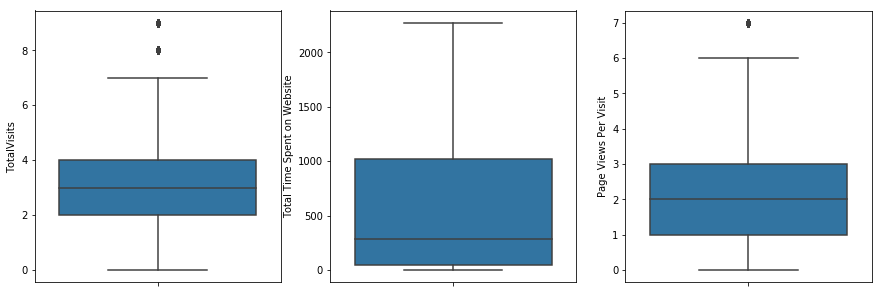

In [178]:
# plotting boxplots for the numerical variables

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y='TotalVisits', data=new_lead_df)
plt.subplot(1,3,2)
sns.boxplot(y='Total Time Spent on Website', data=new_lead_df)
plt.subplot(1,3,3)
sns.boxplot(y='Page Views Per Visit', data=new_lead_df)
plt.show()

All the Outliers need to be removed as they will alter various statistical aspects and will decrease the accuracy of our prediction model

In [93]:
# removing outliers for the column 'TotalVisits'
q1 = new_lead_df['TotalVisits'].quantile(0.25)
q3 = new_lead_df['TotalVisits'].quantile(0.75)
IQR = q3-q1
new_lead_df = new_lead_df[~((new_lead_df['TotalVisits'] < (q1-1.5*IQR)) | (new_lead_df['TotalVisits'] > (q3+1.5*IQR)) )]

# removing outliers for the column 'Total Time Spent on Website'
q1 = new_lead_df['Total Time Spent on Website'].quantile(0.25)
q3 = new_lead_df['Total Time Spent on Website'].quantile(0.75)
IQR = q3-q1
new_lead_df = new_lead_df[~((new_lead_df['Total Time Spent on Website'] < (q1-1.5*IQR)) | (new_lead_df['Total Time Spent on Website'] > (q3+1.5*IQR)) )]

# removing outliers for the column 'Page Views Per Visit'
q1 = new_lead_df['Page Views Per Visit'].quantile(0.25)
q3 = new_lead_df['Page Views Per Visit'].quantile(0.75)
IQR = q3-q1
new_lead_df = new_lead_df[~((new_lead_df['Page Views Per Visit'] < (q1-1.5*IQR)) | (new_lead_df['Page Views Per Visit'] > (q3+1.5*IQR)) )]

In [94]:
# checking their statistical values
new_lead_df[num_vars].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5375.000000,5375.000000,5375.000000
mean,2.956093,536.766884,2.327725
std,2.205891,562.934314,1.694955
min,0.000000,0.000000,0.000000
25%,2.000000,46.000000,1.000000
50%,3.000000,289.000000,2.000000
75%,4.000000,1021.000000,3.000000
90%,6.000000,1425.000000,5.000000
95%,7.000000,1593.600000,5.000000
99%,9.000000,1845.260000,7.000000


Checking for the missing values

In [95]:
new_lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5375 entries, 0 to 9239
Columns: 130 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(12), uint8(116)
memory usage: 1.2 MB


In [96]:
round(100*(new_lead_df.isnull().sum()/len(new_lead_df.index)),2)

Lead Number                                           0.0
Do Not Email                                          0.0
Do Not Call                                           0.0
Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Search                                                0.0
Newspaper Article                                     0.0
X Education Forums                                    0.0
Newspaper                                             0.0
Digital Advertisement                                 0.0
Through Recommendations                               0.0
A free copy of Mastering The Interview                0.0
Lead Origin_Landing Page Submission                   0.0
Lead Origin_Lead Add Form                             0.0
Lead Origin_Lead Import                               0.0
Lead Source_Di

## 4. Train-Test Split

In [97]:
# defining target variance 'y'
y = new_lead_df[['Lead Number','Converted']]
y = y.set_index('Lead Number')
# defining the Dataset containing the independent variables
X = new_lead_df.drop('Converted', axis=1)
X = X.set_index('Lead Number')

In [98]:
y.head()

,Converted
Lead Number,
660737,0
660728,0
660727,1
660719,0
660681,1


In [99]:
y.head()

,Converted
Lead Number,
660737,0
660728,0
660727,1
660719,0
660681,1


In [100]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
660727,0,0,2.0,1532,2.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
660719,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [101]:
# spliting into train and test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 100)

## Scaling

In [102]:
# instantiation a variable
scaler = StandardScaler()

# applying the scaler and fit_transform on the numerical variables
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
601495,0,0,0.928814,-0.686438,0.099978,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
629871,0,0,0.928814,-0.289102,1.559192,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
646558,0,0,1.380611,-0.426917,2.142878,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
604384,0,0,0.477017,0.176245,0.975507,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
588718,1,0,0.477017,-0.509248,0.975507,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 5. Feature Selection using RFE

In [103]:
# Instantiating a Logistic Regression variable
Logreg = LogisticRegression()

# using RFE
rfe = RFE(Logreg, 15)  # selecting only the 15 features
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
# checking the columns supported by RFE
print(X_train.columns[rfe.support_])

Index(['Lead Origin_Lead Add Form', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Profile_Student of SomeSchool'],
      dtype='object')


In [105]:
# Instantiating a Logistic Regression variable
Logreg = LogisticRegression()

# using RFE
rfe = RFE(Logreg, 20)  # selecting only the 20 features
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
# checking the columns supported by RFE
print(X_train.columns[rfe.support_])

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified'],
      dtype='object')


In [107]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

## 6. Model Formation

#### Building our first training model

In [108]:
# adding a constant 
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3741
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -360.78
Date:                Mon, 07 Oct 2019   Deviance:                       721.57
Time:                        02:11:20   Pearson chi2:                 5.34e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6342      0.301     -8.757      0.000      -3.224      -2.045
Total Time Spent on Website                  1.0763      0.113      9.485      0.000       0.854       1.299
Lead Origin_Lead Add Form                    0.5236      0.433      1.209      0.227      -0.325       1.373
Last Activity_SMS Sent                       1.8810      0.255      7.374      0.000       1.381       2.381
Specialization_Travel and Tourism           -1.2415      0.678     -1.831      0.067      -2.571       0.088
Tags_Busy                                    2.8810      0.364      7.910      0.000       2.167       3.595
Tags_Closed by Horizzon                      8.7850      0.811     10.828      0.000       7.195      10.375
Tags_Interested  in full time MBA           -1.2016      1.064     -1.129      0.259      -3.287       0.884
Tags_Lateral student                        27.4579   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                            8.9416      1.094      8.173      0.000       6.797      11.086
Tags_Not doing further education            -1.3116      1.055     -1.243      0.214      -3.380       0.756
Tags_Ringing                                -1.4464      0.383     -3.778      0.000      -2.197      -0.696
Tags_Will revert after reading the email     6.4267      0.327     19.626      0.000       5.785       7.068
Tags_in touch with EINS                      2.4482      0.896      2.733      0.006       0.693       4.204
Tags_invalid number                        -22.1026   1.55e+04     -0.001      0.999   -3.03e+04    3.03e+04
Tags_number not provided                   -22.3824    2.6e+04     -0.001      0.999    -5.1e+04     5.1e+04
Tags_switched off                           -1.6855      0.670     -2.515      0.012      -2.999      -0.372
Tags_wrong number given                    -22.6744   2.27e+04     -0.001      0.999   -4.46e+04    4.45e+04
Lead Profile_Select                         -1.1281      0.231     -4.888      0.000      -1.580      -0.676
Lead Profile_Student of SomeSchool          -2.6948      0.792     -3.402      0.001      -4.247      -1.142
Last Notable Activity_Modified              -1.1611      0.243     -4.777      0.000      -1.637      -0.685
============================================================================================================
"""

From the p-values we can see the columns which are causing insignificance.

#### Let's Check VIFs

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
17,Lead Profile_Select,2.45
11,Tags_Will revert after reading the email,1.96
2,Last Activity_SMS Sent,1.85
10,Tags_Ringing,1.67
1,Lead Origin_Lead Add Form,1.63
19,Last Notable Activity_Modified,1.52
5,Tags_Closed by Horizzon,1.49
0,Total Time Spent on Website,1.21
15,Tags_switched off,1.14
4,Tags_Busy,1.11


VIF values are within the limit

In [110]:
# dropping column 'Tags_Lateral student'
col = col.drop('Tags_Lateral student',1)

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3742
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -366.45
Date:                Mon, 07 Oct 2019   Deviance:                       732.90
Time:                        02:11:20   Pearson chi2:                 5.41e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.5626      0.293     -8.752      0.000      -3.136      -1.989
Total Time Spent on Website                  1.0541      0.112      9.430      0.000       0.835       1.273
Lead Origin_Lead Add Form                    0.5011      0.431      1.162      0.245      -0.344       1.346
Last Activity_SMS Sent                       1.9653      0.255      7.708      0.000       1.466       2.465
Specialization_Travel and Tourism           -1.2558      0.672     -1.870      0.062      -2.572       0.061
Tags_Busy                                    2.7486      0.357      7.707      0.000       2.050       3.448
Tags_Closed by Horizzon                      8.6534      0.806     10.739      0.000       7.074      10.233
Tags_Interested  in full time MBA           -1.2756      1.060     -1.203      0.229      -3.353       0.802
Tags_Lost to EINS                            8.8043      1.090      8.077      0.000       6.668      10.941
Tags_Not doing further education            -1.4124      1.052     -1.343      0.179      -3.473       0.649
Tags_Ringing                                -1.5731      0.378     -4.162      0.000      -2.314      -0.832
Tags_Will revert after reading the email     6.3112      0.318     19.862      0.000       5.688       6.934
Tags_in touch with EINS                      2.3218      0.895      2.594      0.009       0.568       4.076
Tags_invalid number                        -22.2057   1.55e+04     -0.001      0.999   -3.04e+04    3.03e+04
Tags_number not provided                   -22.5005    2.6e+04     -0.001      0.999   -5.11e+04     5.1e+04
Tags_switched off                           -1.8189      0.667     -2.727      0.006      -3.126      -0.512
Tags_wrong number given                    -22.8068   2.27e+04     -0.001      0.999   -4.46e+04    4.45e+04
Lead Profile_Select                         -1.1318      0.229     -4.951      0.000      -1.580      -0.684
Lead Profile_Student of SomeSchool          -2.7254      0.786     -3.469      0.001      -4.265      -1.185
Last Notable Activity_Modified              -1.0897      0.240     -4.549      0.000      -1.559      -0.620
============================================================================================================
"""

In [111]:
# dropping column 'Tags_invalid number'
col = col.drop('Tags_invalid number',1)

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3743
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -369.89
Date:                Mon, 07 Oct 2019   Deviance:                       739.78
Time:                        02:11:20   Pearson chi2:                 5.19e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6808      0.293     -9.142      0.000      -3.256      -2.106
Total Time Spent on Website                  1.0462      0.111      9.459      0.000       0.829       1.263
Lead Origin_Lead Add Form                    0.5021      0.431      1.164      0.244      -0.343       1.347
Last Activity_SMS Sent                       1.9060      0.250      7.609      0.000       1.415       2.397
Specialization_Travel and Tourism           -1.2581      0.666     -1.889      0.059      -2.563       0.047
Tags_Busy                                    2.9174      0.351      8.308      0.000       2.229       3.606
Tags_Closed by Horizzon                      8.7547      0.806     10.861      0.000       7.175      10.334
Tags_Interested  in full time MBA           -1.1513      1.060     -1.086      0.277      -3.229       0.926
Tags_Lost to EINS                            8.8955      1.088      8.175      0.000       6.763      11.028
Tags_Not doing further education            -1.2884      1.052     -1.225      0.221      -3.350       0.773
Tags_Ringing                                -1.3827      0.371     -3.730      0.000      -2.109      -0.656
Tags_Will revert after reading the email     6.4356      0.317     20.331      0.000       5.815       7.056
Tags_in touch with EINS                      2.4416      0.895      2.727      0.006       0.687       4.197
Tags_number not provided                   -22.2963   2.61e+04     -0.001      0.999   -5.12e+04    5.12e+04
Tags_switched off                           -1.6273      0.662     -2.458      0.014      -2.925      -0.329
Tags_wrong number given                    -22.6216   2.28e+04     -0.001      0.999   -4.46e+04    4.46e+04
Lead Profile_Select                         -1.1634      0.228     -5.097      0.000      -1.611      -0.716
Lead Profile_Student of SomeSchool          -2.6946      0.800     -3.367      0.001      -4.263      -1.126
Last Notable Activity_Modified              -1.0463      0.240     -4.357      0.000      -1.517      -0.576
============================================================================================================
"""

In [112]:
# dropping columns 'Tags_number not provided' and 'Tags_wrong number given'
col = col.drop(['Tags_number not provided','Tags_wrong number given'],1)

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3745
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -374.66
Date:                Mon, 07 Oct 2019   Deviance:                       749.31
Time:                        02:11:20   Pearson chi2:                 4.84e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8690      0.296     -9.700      0.000      -3.449      -2.289
Total Time Spent on Website                  1.0356      0.110      9.412      0.000       0.820       1.251
Lead Origin_Lead Add Form                    0.5183      0.431      1.203      0.229      -0.326       1.363
Last Activity_SMS Sent                       1.8001      0.244      7.388      0.000       1.323       2.278
Specialization_Travel and Tourism           -1.2449      0.662     -1.881      0.060      -2.542       0.052
Tags_Busy                                    3.1549      0.346      9.128      0.000       2.477       3.832
Tags_Closed by Horizzon                      8.8853      0.807     11.004      0.000       7.303      10.468
Tags_Interested  in full time MBA           -0.9658      1.060     -0.911      0.362      -3.043       1.111
Tags_Lost to EINS                            9.0175      1.087      8.296      0.000       6.887      11.148
Tags_Not doing further education            -1.0997      1.052     -1.046      0.296      -3.161       0.961
Tags_Ringing                                -1.1091      0.360     -3.081      0.002      -1.815      -0.403
Tags_Will revert after reading the email     6.6139      0.318     20.814      0.000       5.991       7.237
Tags_in touch with EINS                      2.6151      0.895      2.921      0.003       0.860       4.370
Tags_switched off                           -1.3482      0.655     -2.057      0.040      -2.633      -0.064
Lead Profile_Select                         -1.1626      0.227     -5.119      0.000      -1.608      -0.717
Lead Profile_Student of SomeSchool          -2.6294      0.822     -3.200      0.001      -4.240      -1.019
Last Notable Activity_Modified              -0.9904      0.241     -4.107      0.000      -1.463      -0.518
============================================================================================================
"""

Again checking VIFs

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
13,Lead Profile_Select,2.35
10,Tags_Will revert after reading the email,1.92
2,Last Activity_SMS Sent,1.82
1,Lead Origin_Lead Add Form,1.63
9,Tags_Ringing,1.63
15,Last Notable Activity_Modified,1.51
5,Tags_Closed by Horizzon,1.49
0,Total Time Spent on Website,1.21
12,Tags_switched off,1.13
4,Tags_Busy,1.11


In [114]:
# dropping column 'Lead Origin_Lead Add Form'
col = col.drop('Lead Origin_Lead Add Form',1)

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3746
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.43
Date:                Mon, 07 Oct 2019   Deviance:                       750.85
Time:                        02:11:20   Pearson chi2:                 4.79e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8333      0.293     -9.672      0.000      -3.407      -2.259
Total Time Spent on Website                  1.0161      0.109      9.305      0.000       0.802       1.230
Last Activity_SMS Sent                       1.8222      0.242      7.519      0.000       1.347       2.297
Specialization_Travel and Tourism           -1.3182      0.665     -1.981      0.048      -2.622      -0.014
Tags_Busy                                    3.1505      0.346      9.117      0.000       2.473       3.828
Tags_Closed by Horizzon                      9.1689      0.778     11.778      0.000       7.643      10.695
Tags_Interested  in full time MBA           -0.9687      1.059     -0.914      0.361      -3.045       1.108
Tags_Lost to EINS                            9.0844      1.085      8.370      0.000       6.957      11.212
Tags_Not doing further education            -1.1086      1.051     -1.054      0.292      -3.169       0.952
Tags_Ringing                                -1.1094      0.360     -3.082      0.002      -1.815      -0.404
Tags_Will revert after reading the email     6.7002      0.313     21.412      0.000       6.087       7.313
Tags_in touch with EINS                      2.6082      0.895      2.915      0.004       0.855       4.362
Tags_switched off                           -1.3655      0.655     -2.085      0.037      -2.649      -0.082
Lead Profile_Select                         -1.2064      0.224     -5.377      0.000      -1.646      -0.767
Lead Profile_Student of SomeSchool          -2.7037      0.830     -3.258      0.001      -4.330      -1.077
Last Notable Activity_Modified              -1.0043      0.241     -4.164      0.000      -1.477      -0.532
============================================================================================================
"""

In [115]:
# dropping column 'Tags_Interested in full time MBA'
col = col.drop('Tags_Interested  in full time MBA',1)

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3747
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.97
Date:                Mon, 07 Oct 2019   Deviance:                       751.94
Time:                        02:11:20   Pearson chi2:                 4.83e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9213      0.283    -10.309      0.000      -3.477      -2.366
Total Time Spent on Website                  1.0122      0.109      9.296      0.000       0.799       1.226
Last Activity_SMS Sent                       1.8474      0.243      7.615      0.000       1.372       2.323
Specialization_Travel and Tourism           -1.3291      0.660     -2.012      0.044      -2.624      -0.035
Tags_Busy                                    3.2122      0.343      9.365      0.000       2.540       3.885
Tags_Closed by Horizzon                      9.2406      0.777     11.897      0.000       7.718      10.763
Tags_Lost to EINS                            9.1471      1.084      8.440      0.000       7.023      11.271
Tags_Not doing further education            -1.0279      1.049     -0.980      0.327      -3.084       1.028
Tags_Ringing                                -1.0488      0.358     -2.933      0.003      -1.750      -0.348
Tags_Will revert after reading the email     6.7727      0.308     21.970      0.000       6.169       7.377
Tags_in touch with EINS                      2.6820      0.893      3.003      0.003       0.931       4.432
Tags_switched off                           -1.3061      0.654     -1.998      0.046      -2.587      -0.025
Lead Profile_Select                         -1.1927      0.224     -5.330      0.000      -1.631      -0.754
Lead Profile_Student of SomeSchool          -2.6627      0.837     -3.182      0.001      -4.303      -1.022
Last Notable Activity_Modified              -0.9998      0.241     -4.151      0.000      -1.472      -0.528
============================================================================================================
"""

In [116]:
# dropping column 'Specialization_Travel and Tourism'
col = col.drop('Specialization_Travel and Tourism',1)

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3748
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -377.77
Date:                Mon, 07 Oct 2019   Deviance:                       755.55
Time:                        02:11:21   Pearson chi2:                 4.84e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9355      0.282    -10.394      0.000      -3.489      -2.382
Total Time Spent on Website                  1.0079      0.109      9.263      0.000       0.795       1.221
Last Activity_SMS Sent                       1.8355      0.242      7.595      0.000       1.362       2.309
Tags_Busy                                    3.2093      0.342      9.375      0.000       2.538       3.880
Tags_Closed by Horizzon                      9.2589      0.777     11.914      0.000       7.736      10.782
Tags_Lost to EINS                            9.1690      1.083      8.468      0.000       7.047      11.291
Tags_Not doing further education            -1.0154      1.048     -0.968      0.333      -3.070       1.040
Tags_Ringing                                -1.0279      0.357     -2.883      0.004      -1.727      -0.329
Tags_Will revert after reading the email     6.7466      0.306     22.063      0.000       6.147       7.346
Tags_in touch with EINS                      2.7109      0.891      3.041      0.002       0.964       4.458
Tags_switched off                           -1.2908      0.653     -1.977      0.048      -2.570      -0.011
Lead Profile_Select                         -1.1887      0.223     -5.325      0.000      -1.626      -0.751
Lead Profile_Student of SomeSchool          -2.6270      0.834     -3.148      0.002      -4.263      -0.991
Last Notable Activity_Modified              -1.0233      0.240     -4.264      0.000      -1.494      -0.553
============================================================================================================
"""

In [117]:
# dropping column 'Tags_Not doing further education'
col = col.drop('Tags_Not doing further education',1)

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3749
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -378.40
Date:                Mon, 07 Oct 2019   Deviance:                       756.79
Time:                        02:11:21   Pearson chi2:                 4.84e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0195      0.275    -10.968      0.000      -3.559      -2.480
Total Time Spent on Website                  1.0072      0.109      9.267      0.000       0.794       1.220
Last Activity_SMS Sent                       1.8507      0.242      7.645      0.000       1.376       2.325
Tags_Busy                                    3.2752      0.340      9.639      0.000       2.609       3.941
Tags_Closed by Horizzon                      9.3386      0.775     12.046      0.000       7.819      10.858
Tags_Lost to EINS                            9.2409      1.081      8.546      0.000       7.122      11.360
Tags_Ringing                                -0.9645      0.354     -2.722      0.006      -1.659      -0.270
Tags_Will revert after reading the email     6.8223      0.301     22.630      0.000       6.231       7.413
Tags_in touch with EINS                      2.7897      0.889      3.136      0.002       1.046       4.533
Tags_switched off                           -1.2279      0.652     -1.885      0.059      -2.505       0.049
Lead Profile_Select                         -1.1749      0.223     -5.274      0.000      -1.612      -0.738
Lead Profile_Student of SomeSchool          -2.5861      0.842     -3.073      0.002      -4.236      -0.937
Last Notable Activity_Modified              -1.0312      0.239     -4.307      0.000      -1.500      -0.562
============================================================================================================
"""

In [118]:
# dropping column 'Tags_switched off'
col = col.drop('Tags_switched off',1)

# again building the model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log_model = logm1.fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3762
Model:                            GLM   Df Residuals:                     3750
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -380.64
Date:                Mon, 07 Oct 2019   Deviance:                       761.28
Time:                        02:11:21   Pearson chi2:                 4.58e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.2108      0.270    -11.907      0.000      -3.739      -2.682
Total Time Spent on Website                  1.0175      0.109      9.332      0.000       0.804       1.231
Last Activity_SMS Sent                       1.7609      0.236      7.472      0.000       1.299       2.223
Tags_Busy                                    3.5233      0.325     10.841      0.000       2.886       4.160
Tags_Closed by Horizzon                      9.5072      0.775     12.267      0.000       7.988      11.026
Tags_Lost to EINS                            9.4010      1.080      8.706      0.000       7.285      11.517
Tags_Ringing                                -0.7006      0.335     -2.089      0.037      -1.358      -0.043
Tags_Will revert after reading the email     7.0244      0.294     23.853      0.000       6.447       7.602
Tags_in touch with EINS                      2.9723      0.890      3.341      0.001       1.229       4.716
Lead Profile_Select                         -1.1955      0.222     -5.381      0.000      -1.631      -0.760
Lead Profile_Student of SomeSchool          -2.5509      0.866     -2.946      0.003      -4.248      -0.854
Last Notable Activity_Modified              -0.9740      0.241     -4.040      0.000      -1.447      -0.501
============================================================================================================
"""

In [184]:
coeff_df = pd.DataFrame(log_model.params)
coeff_df.reset_index(inplace=True)
coeff_df = coeff_df.rename(columns={'index':'Variables',0:'Coefficients'})
coeff_df.head()

,Variables,Coefficients
0,const,-3.210786
1,Total Time Spent on Website,1.017534
2,Last Activity_SMS Sent,1.760875
3,Tags_Busy,3.523254
4,Tags_Closed by Horizzon,9.507168


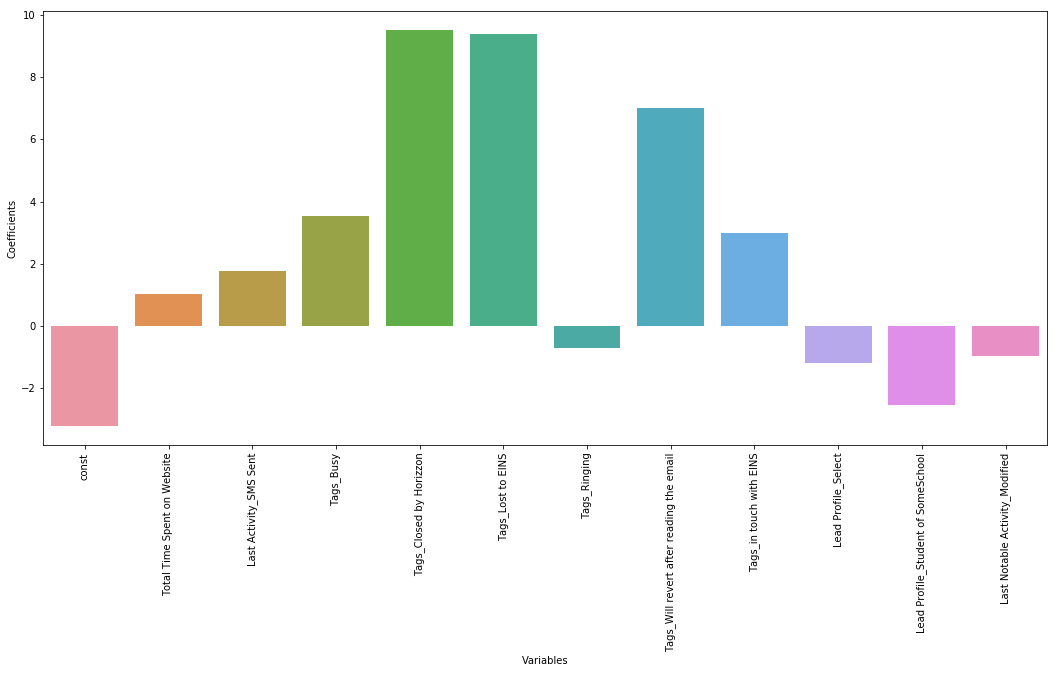

In [190]:
plt.figure(figsize=(18,8))
sns.barplot(data=coeff_df, x= 'Variables', y='Coefficients')
plt.xticks(rotation=90)
plt.show()

Checking VIF values

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
8,Lead Profile_Select,2.14
1,Last Activity_SMS Sent,1.78
6,Tags_Will revert after reading the email,1.64
5,Tags_Ringing,1.53
10,Last Notable Activity_Modified,1.44
3,Tags_Closed by Horizzon,1.11
0,Total Time Spent on Website,1.09
2,Tags_Busy,1.09
4,Tags_Lost to EINS,1.06
9,Lead Profile_Student of SomeSchool,1.04


In [120]:
y_train_pred = log_model.predict(X_train_sm)

In [121]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.03140034e-03, 6.19160516e-02, 9.81008989e-01, 1.43873071e-02,
       2.05503060e-02, 9.92686541e-01, 7.53094019e-03, 9.55852641e-01,
       9.06428898e-04, 9.77622491e-01])

In [128]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values.reshape(-1), 'Lead_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_Prob,Lead Number
0,0,0.006031,601495
1,0,0.061916,629871
2,1,0.981009,646558
3,0,0.014387,604384
4,0,0.020550,588718


In [129]:
y_train_pred_final['Predicted_Lead'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [130]:
y_train_pred_final.head()

,Lead,Lead_Prob,Lead Number,Predicted_Lead
0,0,0.006031,601495,0
1,0,0.061916,629871,0
2,1,0.981009,646558,1
3,0,0.014387,604384,0
4,0,0.020550,588718,0


In [131]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.Predicted_Lead )
print(confusion)

[[1986   61]
 [  61 1654]]


In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.Predicted_Lead))

0.9675704412546517


#### The Accuracy of the Model came out to be 96.75%

Let us now, for the Sensitivity and Specificity

In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9644314868804664

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.9702002931118711

In [136]:
# Calculate false postive rate - predicting lead when customer does not have lead
print(FP/ float(TN+FP))

0.02979970688812897


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.9644314868804664


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9702002931118711


## 7.Plotting the ROC curve

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

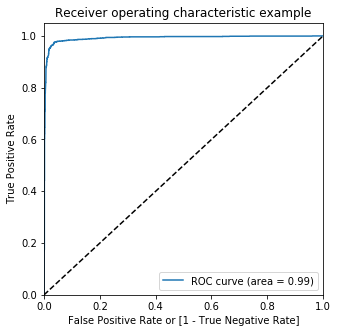

In [141]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,Lead Number,Predicted_Lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006031,601495,0,1,0,0,0,0,0,0,0,0,0
1,0,0.061916,629871,0,1,0,0,0,0,0,0,0,0,0
2,1,0.981009,646558,1,1,1,1,1,1,1,1,1,1,1
3,0,0.014387,604384,0,1,0,0,0,0,0,0,0,0,0
4,0,0.020550,588718,0,1,0,0,0,0,0,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.455875  1.000000  0.000000
0.1   0.1  0.944179  0.983673  0.911089
0.2   0.2  0.965710  0.977843  0.955545
0.3   0.3  0.968102  0.973178  0.963850
0.4   0.4  0.967039  0.969096  0.965315
0.5   0.5  0.967570  0.964431  0.970200
0.6   0.6  0.967570  0.959184  0.974597
0.7   0.7  0.967305  0.954519  0.978017
0.8   0.8  0.966507  0.948105  0.981925
0.9   0.9  0.951887  0.906706  0.989741


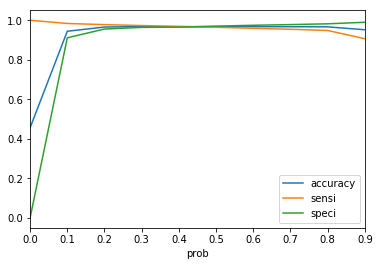

In [144]:
    # Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [145]:
#### From the curve above, 0.44 is the optimum point to take it as a cutoff probability.

In [146]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Lead,Lead_Prob,Lead Number,Predicted_Lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006031,601495,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.061916,629871,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.981009,646558,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.014387,604384,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.020550,588718,0,1,0,0,0,0,0,0,0,0,0,0


In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.9675704412546517

##### Precision
TP / TP + FP

In [148]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9644314868804664

##### Recall
TP / TP + FN

In [150]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9644314868804664

In [154]:
from sklearn.metrics import precision_recall_curve

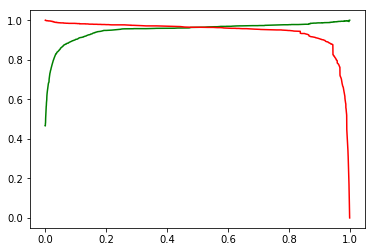

In [157]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

This graph also refers to a number between 4 and 5

## 8. Prediction Analysis

### Making predictions on the test set

In [152]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [153]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Lead Profile_Select,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified
Lead Number,,,,,,,,,,,
639019,-0.783087,1,0,0,0,1,0,0,1,0,1
655061,0.673809,0,0,0,0,0,1,0,0,0,1
630779,2.610371,0,0,0,0,0,1,0,1,0,1
583741,0.985234,0,0,0,0,1,0,0,0,0,0
605602,-0.842150,0,0,0,0,0,0,0,1,0,0


In [158]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [160]:
y_test_pred = log_model.predict(X_test_sm)

In [168]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred.head()

,0
Lead Number,
639019,0.005960
655061,0.971398
630779,0.986617
583741,0.051718
605602,0.005152


In [169]:
y_pred = y_pred.rename(columns={0: 'Lead_Prob'})

In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
Lead Number,
639019,0
655061,1
630779,1
583741,0
605602,0


In [171]:
# Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [172]:
y_pred_final.head()

,Converted,Lead_Prob
Lead Number,,
639019,0,0.005960
655061,1,0.971398
630779,1,0.986617
583741,0,0.051718
605602,0,0.005152


In [173]:
# resetting the index
y_pred_final.reset_index(inplace=True)
y_pred_final.head()

,Lead Number,Converted,Lead_Prob
0,639019,0,0.005960
1,655061,1,0.971398
2,630779,1,0.986617
3,583741,0,0.051718
4,605602,0,0.005152


In [175]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final.head()

,Lead Number,Converted,Lead_Prob,final_predicted
0,639019,0,0.005960,0
1,655061,1,0.971398,1
2,630779,1,0.986617,1
3,583741,0,0.051718,0
4,605602,0,0.005152,0


#### Checking the Accuracy

In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9547427154370738

<font color='red' size=5> The Accuracy for predictions of out Logistic Regression Model is 95.47%.</font>